In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from tqdm import tqdm

from sklearn.preprocessing import MinMaxScaler

import time


In [2]:
# !pip install xgboost

In [3]:
from xgboost import XGBRanker

In [4]:
df = pd.read_csv('train_preprocessed_2.csv')
df.head()

,srch_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,...,random_bool,click_bool,booking_bool,price_usd_mean,price_diff_with_mean_price,month,day_of_week,relevance,highly_rated_prop,total_people
0,1,219,893,3,3.5,1,2.83,0.0438,4.95,27,...,1,0,0,150.114326,45.344326,4,3,0.0,0,4
1,1,219,10404,4,4.0,1,2.20,0.0149,5.03,26,...,1,0,0,150.114326,20.625674,4,3,0.0,1,4
2,1,219,21315,3,4.5,1,2.20,0.0245,4.92,21,...,1,0,0,150.114326,29.685674,4,3,0.0,0,4
3,1,219,27348,2,4.0,1,2.83,0.0125,4.39,34,...,1,0,0,150.114326,452.655674,4,3,0.0,0,4
4,1,219,29604,4,3.5,1,2.64,0.1241,4.93,4,...,1,0,0,150.114326,6.534326,4,3,0.0,1,4


In [5]:
X = df
train_groups = X.groupby('srch_id').size().to_frame('size')['size'].to_numpy()

relevances = X['relevance']

X= X.loc[:, ~X.columns.isin(['srch_id','relevance'])]
y = relevances

In [6]:
X.columns

Index(['prop_country_id', 'prop_id', 'prop_starrating', 'prop_review_score',
       'prop_brand_bool', 'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_room_count', 'srch_saturday_night_bool',
       'orig_destination_distance', 'random_bool', 'click_bool',
       'booking_bool', 'price_usd_mean', 'price_diff_with_mean_price', 'month',
       'day_of_week', 'highly_rated_prop', 'total_people'],
      dtype='object')

In [7]:
X = X.drop(['booking_bool','position','random_bool','prop_id','click_bool'], axis=1)


In [8]:
model = XGBRanker(
                  objective='rank:ndcg', 
                  n_estimators=200, 
                  random_state=0,
                  learning_rate=0.1)


model.fit(
    X,
    y,
    group=train_groups,
    eval_metric='ndcg@5',
    eval_set=[(X, y)],
    eval_group=[list(train_groups)],
    verbose=True,
    early_stopping_rounds=10
)

/home/shreyas/.local/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/shreyas/.local/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-ndcg@5:0.60112
[1]	validation_0-ndcg@5:0.60248
[2]	validation_0-ndcg@5:0.60253
[3]	validation_0-ndcg@5:0.60239
[4]	validation_0-ndcg@5:0.60287
[5]	validation_0-ndcg@5:0.60356
[6]	validation_0-ndcg@5:0.60378
[7]	validation_0-ndcg@5:0.60462
[8]	validation_0-ndcg@5:0.60604
[9]	validation_0-ndcg@5:0.60658
[10]	validation_0-ndcg@5:0.60692
[11]	validation_0-ndcg@5:0.60727
[12]	validation_0-ndcg@5:0.60914
[13]	validation_0-ndcg@5:0.61019
[14]	validation_0-ndcg@5:0.61066
[15]	validation_0-ndcg@5:0.61134
[16]	validation_0-ndcg@5:0.61212
[17]	validation_0-ndcg@5:0.61268
[18]	validation_0-ndcg@5:0.61325
[19]	validation_0-ndcg@5:0.61400
[20]	validation_0-ndcg@5:0.61473
[21]	validation_0-ndcg@5:0.61535
[22]	validation_0-ndcg@5:0.61587
[23]	validation_0-ndcg@5:0.61658
[24]	validation_0-ndcg@5:0.61692
[25]	validation_0-ndcg@5:0.61722
[26]	validation_0-ndcg@5:0.61766
[27]	validation_0-ndcg@5:0.61812
[28]	validation_0-ndcg@5:0.61876
[29]	validation_0-ndcg@5:0.61912
[30]	validation_0-nd

XGBRanker(base_score=None, booster=None, callbacks=None, colsample_bylevel=None,
          colsample_bynode=None, colsample_bytree=None,
          early_stopping_rounds=None, enable_categorical=False,
          eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
          grow_policy=None, importance_type=None, interaction_constraints=None,
          learning_rate=0.1, max_bin=None, max_cat_threshold=None,
          max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
          max_leaves=None, min_child_weight=None, missing=nan,
          monotone_constraints=None, n_estimators=200, n_jobs=None,
          num_parallel_tree=None, objective='rank:ndcg', predictor=None, ...)

<Axes: >

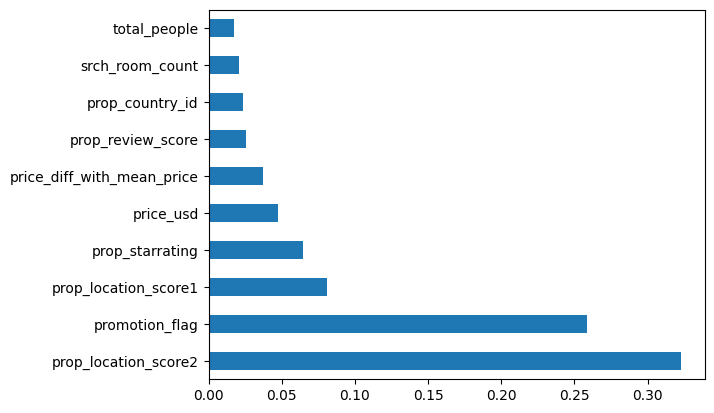

In [9]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [10]:
test_df = pd.read_csv('test_preprocessed_2.csv')

In [11]:
print(len(test_df))

4959183


In [12]:
def sort_properties(srch_id, scores, prop_ids):
    sorted_group = pd.DataFrame(columns=['srch_id', 'prop_id', 'scores'])
    sorted_group['srch_id'] = len(scores)*[srch_id]
    sorted_group['prop_id'] = prop_ids.values
    sorted_group['scores'] = scores
    sorted_group = sorted_group.sort_values(by='scores', ascending=False)
    return sorted_group 

def recommend_properties(model, data):
    result = pd.DataFrame(columns=['srch_id', 'prop_id', 'scores'])
    df_list = []
    grouped_data = data.groupby('srch_id')
    for group_name, group in tqdm(grouped_data):
        scores = model.predict(group.loc[:, ~group.columns.isin(['srch_id','prop_id'])])
        sorted_group = sort_properties(group_name, scores, group['prop_id'])
        df_list.append(sorted_group)
    result = pd.concat(df_list)
    return result

In [13]:
X.columns

Index(['prop_country_id', 'prop_starrating', 'prop_review_score',
       'prop_brand_bool', 'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_room_count', 'srch_saturday_night_bool',
       'orig_destination_distance', 'price_usd_mean',
       'price_diff_with_mean_price', 'month', 'day_of_week',
       'highly_rated_prop', 'total_people'],
      dtype='object')

In [14]:
test_df.columns

Index(['srch_id', 'prop_country_id', 'prop_id', 'prop_starrating',
       'prop_review_score', 'prop_brand_bool', 'prop_location_score1',
       'prop_location_score2', 'prop_log_historical_price', 'price_usd',
       'promotion_flag', 'srch_destination_id', 'srch_length_of_stay',
       'srch_booking_window', 'srch_room_count', 'srch_saturday_night_bool',
       'orig_destination_distance', 'price_usd_mean',
       'price_diff_with_mean_price', 'month', 'day_of_week',
       'highly_rated_prop', 'total_people'],
      dtype='object')

In [15]:
start = time.time()
recommendations = recommend_properties(model, test_df)
end = time.time()
print(f'Total Time for validation prediction:{end - start}')
submission = recommendations.drop(columns=['scores'])
submission.to_csv(f'xgbranker_predictions.csv', index=False)

100%|██████████| 199549/199549 [14:42<00:00, 226.18it/s]


Total Time for validation prediction:897.7820701599121
